# HuggingFace Transformers

## Chapter 1 : Pipelines and Introduction to HuggingFace

### Text Classification Pipeline

In [1]:
from transformers import pipeline

# HuggingFace transformers has a layered API that lets you interact with the library at different levels
# of abstraction. pipelines abstract away the steps needed to convert raw text into a set of predictions
# from a fine-tuned model


# instantiating a pipeline for text-classification
classifier = pipeline('text-classification')

# when no model is passed into pipeline (a model specific pipeline) it loads in some default pipeline for the task
# by default the model it grabs is one designed for sentiment analysis but it also supports multiclass classification

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [2]:
# now let's generate some predictions. Each pipeline takes a string of text as inputs and returns a list of predictions
# each prediction is a dictionary e.g.

import pandas as pd

text = """Dear Amazon, last week I ordered an Optimus Prime action figure
    from your online store in Germany. Unfortunately, when I opened the package,
    I discovered to my horror that I had been sent an action figure of Megatron
    instead! As a lifelong enemy of the Decepticons, I hope you can understand my
    dilemma. To resolve the issue, I demand an exchange of Megatron for the
    Optimus Prime figure I ordered. Enclosed are copies of my records concerning
    this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""
    
outputs = classifier(text)
pd.DataFrame(outputs)


label     score
0  NEGATIVE  0.901547

In [ ]:
# the model is very confident that the sentiment of the text is negative. 


### Named Entity Recognition Pipeline

In [3]:
# In NLP, real-world objects like products, places, and people are called named entities. Extracting them
# from text is called named entity recognition (NER). There is a ner pipeline which we can take advantage of
# as follows by feeding our customer review into it

ner_tagger = pipeline(task = 'ner', aggregation_strategy = 'simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


entity_group     score           word  start  end
0          ORG  0.879011         Amazon      5   11
1         MISC  0.990859  Optimus Prime     36   49
2          LOC  0.999755        Germany     94  101
3         MISC  0.556571           Mega    216  220
4          PER  0.590255         ##tron    220  224
5          ORG  0.669692         Decept    265  271
6         MISC  0.498348        ##icons    271  276
7         MISC  0.775363       Megatron    366  374
8         MISC  0.987854  Optimus Prime    387  400
9          PER  0.812097      Bumblebee    526  535

In [ ]:
# we see that the pipeline detected, extracted, and categorized all of the named entities in the text. 
# the aggregation_strategy = 'simple' grouped the words according to the model predictions.
# e.g. Optimus Prime is composed of two words but assigned one category

# model was least confident with the first occurrence of Megatron and Decepticons which it failed to identify
# as a single entity

# the hash marks are produced by the tokenizer which splits words into tokens

### Question Answering Pipeline

In [4]:
# in question answering we provide the model with a passage of text called the context along with a question
# whose answer we want to extract. The model returns a span of text corresponding to its
# answer to the question based on the context provided 

reader = pipeline('question-answering')
question = 'What does the customer want?'
outputs = reader(question=question, context = text)
pd.DataFrame([outputs])

# this type of question answering is called extractive question answering because the answer comes directly from
# the text

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


score  start  end                   answer
0  0.631292    351  374  an exchange of Megatron

### Reading about DistilBERT

As Transfer Learning from large-scale pre-trained models becomes prevalent in NLP, operating these large models in on-thee-edge or constrained by computational training or inference budgets is still challenging.

DistilBERT can be fine-tuned with good performances on a wide range of tasts like larger counterparts. This model was a proposed method to pre-train a smaller general purpose language model. 

### Summarization Pipeline

In [29]:
# the goal of text summarization is to take a long text as input and generate a short version with
# only the important facts. This is a much more complicated task than the others because it requires 
# the model to generate coherent text. 

# we instantiate a model 

summarizer = pipeline('summarization')
outputs = summarizer(text, max_length = 45, clean_up_tokenization_spaces = True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your min_length=56 must be inferior than your max_length=45.
/opt/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1156: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that he had been sent an action figure of Megatron instead.


In [ ]:
# the summarization is pretty good. We used to new arguments, max_length and clean_up_tokenization_spaces
# to customize our output when we generated the result from inference

### Translation Pipeline

In [5]:
# translation is another built-in task that pipelines can be used for that
# will generate a new text. See the following where we convert the original
# text from english to german

translator = pipeline('translation_en_to_de', 
                    model = 'Helsinki-NLP/opus-mt-en-de')

outputs = translator(text,clean_up_tokenization_spaces = True, min_length = 100)
print(outputs[0]['translation_text'])


/opt/anaconda3/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


The model produced a very good translation that correctly uses German formal pronouns. Above we overrode the default model in the pipeline to pick the one we want for our purpose.

### Text Generation Pipeline

Before zooming out to take a broader look at the HuggingFace ecosystem let's look at one last application of the pipeline() functon

Suppose we want faster replies to customer feedback by having access to an autocomplete function. A text generation model could do this in the following way:

In [6]:
generator = pipeline('text-generation')
response = 'Dear Bumblebee, I am sorry to hear that your order was mixed up.'
prompt = text + '\n\nCustomer service response:\n' + response

outputs = generator(prompt,max_length = 200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure
    from your online store in Germany. Unfortunately, when I opened the package,
    I discovered to my horror that I had been sent an action figure of Megatron
    instead! As a lifelong enemy of the Decepticons, I hope you can understand my
    dilemma. To resolve the issue, I demand an exchange of Megatron for the
    Optimus Prime figure I ordered. Enclosed are copies of my records concerning
    this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up.

Your order had been placed and you were informed that your order has been received. I've requested you allow me the opportunity to review my inventory. Your order received was correct. But now, you have also


In [ ]:
# ^ ??? bit of a clusterfuck of a response

### HuggingFace Intro

Now we have seen a few cool applications of transformer models. However note that all of these models were already fine-tuned for the task at hand and are publicly available. In general, we want to know how to fine-tune models on our own data so the next chapters will cover this.\
\
We also discuss the overall ecosystem because because there are a number of useful tools for the other parts of the machine learning workflow - efficient data processing, sharing results, and making reproducible work\
\
The HuggingFace ecosystem consists of the Hub and a family of coding libraries. The libraries provide the code and the Hub provides pretrained model weights, datasets, and scripts for evaluation metrics. The libraries are tokenizers, datasets, and transformers

HuggingFace Hub hosts over 20,000 freely available models organized by task, dataset, and more so that models can be found easily and applied with just a few lines of code. One of the coolest features is any model can be tested directly through task-specific widgets located on the model and dataset cards on the site for the model.

HuggingFace Tokenizers - behind each of the pipeline examples we have seen, there is a tokenization step that splits the raw text into smaller pieces called tokens. Tokens may be words, parts of words, or singular characters (including punctuation). When Transformer models are trained on numerical representations of these tokens. Tokenizers then automatically handles the conversion of the model outputs to the required text format.\
\
Provides many tokenization strategies and works extremely fast. Tokenizers lets us load in a tokenizer in the same way we can load pretrained model weights with transformers. Takes care of pre- and postprocessing steps such as normalizing inputs. 

Loading, processing, and storing datasets can be cumbersome esp when the datasets easily get too large to fit in a laptop's RAM.\
\
HuggingFace Datasets simplifies the process of downloading, processing, and transforming ML datasets by providing a standard interface for thousands of datasets on the Hub.

1. Employs smart caching so preprocessing doesn't need to be redone every time the code is run.
2. Avoids RAM limitations by leveraging memory mapping which stores the contents of a file in virtual memory and allows for efficient file modification.
3. Interoperable with various frameworks (NumPy and Pandas for instance).
4. Provides scripts for many metrics to help make experiments more reproducible and trustworthy. 

HuggingFace Accelerate - adds a layer of abstraction to normal training loops that takes care of the custom logic necessary for training infrastructure. Accelerates your workflow by simplifying the change of infrastructure when possible.

Challenges of Using Transformers:
1. NLP research is dominated by the English language.
2. Although transfer learning can be used to reduce the amount of labeled training data necessary to get a model to work, there is still a lot more data needed than what a human would need to perform the task. Later we tackle scenarios where we have little to no labeled data.
3. Self-attention works extremely well on paragraph long text but becomes computationally expensive when we move to longer texts to whole documents. 
4. Transformers, like many other deep learning models, are quite opaque. It is hard to unravel why a model makes the prediction that it makes. Later we explore ways to probe errors made by transformer models.
5. Transformer models are predominately pretrained on text data from the Internet, imprinting all the biases that are present in the data into the pretrained model.

Applying a novel machine learning architecture to a new task usually involves the following steps:
1. Implement the model architecture in code.
2. Load the pretrained weights from a server.
3. Preprocess the inputs, pass them through the model, postprocess the outputs for task-specific performance.
4. Implement dataloaders and define loss functions and optimizers to train the model.

## Chapter 2: Text Classification

Here we will tackle the task of building a system to automatically identify emotional states such as 'anger' or 'joy' that people express about a company's product on Twitter. We will do this with DistilBERT which is a variant of BERT which achieves comparable performance while being significantly smaller and more efficient. \
This lets us train a classifier in a few minutes and we can train a larger BERT model by changing the checkpoint of the pretrained model. \
\
The model checkpoint refers to the set of weights that are loaded into the given transformer architecture.

This exercise will also be our first encounter with three of the core HuggingFace ecosystem libraries: HuggingFace Datasets, Tokenizers, and Transformers which will allow us to quickly go from raw text to a fine-tuned model that can be used for inference. 
1. Datasets: Load and process datasets
2. Tokenizers: Tokenize input texts
3. Transformers: Load models, train and infer
4. Datasets: Load metrics and Evaluate Models 

In short, we will train a model that, given a tweet, will be able to classify it into one of six emotions: anger, disgust, fear, joy, sadness, and surprise. The Dataset we will use has tweets labeled with these emotions.

In [60]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub.")
print(f"The first 10 are {all_datasets[:10]}")

There are 130228 datasets currently available on the Hub.
The first 10 are ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


Each dataset is given a name so we load the emotion dataset



In [61]:
from datasets import load_dataset

emotions = load_dataset('emotion')
emotions

/opt/anaconda3/lib/python3.11/site-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

The entire dataset consists of train, validation, and test datasets, structured in a datastructure called a datasetdict structured like a python dictionary where the different keys are the different subparts of the split.

In [62]:
train_ds, validation_ds, test_ds = emotions['train'], emotions['validation'], emotions['test']

In [63]:
# as expected
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [64]:
len(train_ds)

16000

In [65]:
train_ds[0:10]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}

We see here train_ds is now the train set split, we can query its length and index like a list, and each entry corresponds to a dictionary

In [66]:
train_ds.column_names

['text', 'label']

In [67]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In the case where we find ourself working with data that is not on HuggingFace but instead is on our local machine or whatever, then we can still use load_dataset but using the following function calls:

In [21]:
# load_dataset('csv',data_files='my_file.csv')
# load_dataset('text',data_files='my_file.txt')
# load_dataset('json',data_files='my_file.jsonl')
# if the data is at a url we can write
'''
dataset_url = 'https://.../train.txt'
!wget {dataset_url}

emotions_local = load_dataset('csv', data_files='train.txt', sep = ';', names = ['text','label'])
'''
# we next want to convert the DatasetDict emotions to a pandas Dataframe using the set_format() method that allows us to change the output format of the Dataset without changing
# the underlying data format allowing us to switch between formats

"\ndataset_url = 'https://.../train.txt'\n!wget {dataset_url}\n\nemotions_local = load_dataset('csv', data_files='train.txt', sep = ';', names = ['text','label'])\n"

In [37]:
import pandas as pd
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [73]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df

text  label label_name
0                                i didnt feel humiliated      0    sadness
1      i can go from feeling so hopeless to so damned...      0    sadness
2       im grabbing a minute to post i feel greedy wrong      3      anger
3      i am ever feeling nostalgic about the fireplac...      2       love
4                                   i am feeling grouchy      3      anger
...                                                  ...    ...        ...
15995  i just had a very brief time in the beanbag an...      0    sadness
15996  i am now turning and i feel pathetic that i am...      0    sadness
15997                     i feel strong and good overall      1        joy
15998  i feel like this was such a rude comment and i...      3      anger
15999  i know a lot but i feel so stupid because i ca...      0    sadness

[16000 rows x 3 columns]

In [27]:
# let's dive more into the data before building our classifier
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

We see that the dataset is heavily imbalanced. To deal with it we can do a few things:
1. Randomly oversample the minority class.
2. Randomly undersample the majority class.
3. Gather more labeled data from the underrepresented classes.

To keep things simple here we are skipping this step. The Imbalanced-learn library contains sampling methods for fixing this issue.

Now let's look at the length of the tweets. Transformer models have a maximum input sequence length that is referred to as the maximum context size. For applications using DistilBERT, the maximum context size is 512 tokens which is a few paragraphs of text. Let's get a rough estimate of the number of tokens using the number of words per tweet, although tokens do not always correspond to entire words.

In [28]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

We can see that even the longest tweets in each category are far below the maximum context size. Tweets that are longer would have had to be truncated. Truncation could cause a loss of performance however if the truncation causes information loss. 

In [29]:
# let's reset the output format 
emotions.reset_format()

Transfomers like DistilBERT cannot receive raw strings as input, instead they assume the text has been tokenized and encoded as numerical vectors. Tokenization involves breaking a string down into atomic units the model will use. The optimal splitting of words into subunits is usually learned from the corpus. \
Let's look at two extreme cases word and character tokenization before discussing DistilBERT's tokenizer

In [30]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [34]:
token2idx = {token : idx for idx,token in enumerate(sorted(list(set(tokenized_text))))}
token2idx
# this gives us a mapping from each character in the vocabulary to a unique integer

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [37]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [42]:
len(input_ids)

38

In [43]:
# te final step is convert this into a one-hot encoding
import numpy as np

v = np.zeros([len(input_ids),len(token2idx)])
for i in range(len(input_ids)):
    v[i][input_ids[i]] = 1


In [74]:
v

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.

Can also be done in PyTorch by first converting input_ids to a tensor and applying the one_hot() function

In [75]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids,num_classes = len(token2idx))
one_hot_encodings.shape

/var/folders/z_/65rxv1_d0nl2nlz9w008rj140000gn/T/ipykernel_30533/3011274331.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids)


torch.Size([38, 20])

We can see that the character-level tokenization ignores any structure in the text and just treates the string as a stream of characters. Character tokenization is rarely used because linguistic structure doesn't exist. \
I will not do it here but we could do a word level tokenization and split our strings up around spaces. 

One obvious problem with this is that if we use one-hot encodings recall that at the character level encoding there are not very many tokens we could still have in the vocabulary because there are only 26 letters in the english alphabet. \
If we use one-hot encodings at the word level, we would have a mess of a vector space. A 1 million unique word vocabulary would require a 1 million dimensional vector space which would imply that a layer compressing 1 million dimensional vectors into 1 thousand dimensional vectors would have 1 billion weights. \
Most models make use of subword tokenization which is a compromise between character and word tokenization preserving all of the input information as well as some of the input structure. 


We want to split rare words into smaller units to allow the model to deal with complex words and misspellings. We also want to keep frequent words as unique entities so that we can keep the length of our inputs a manageable size. Subword tokenization (and word tokenization) are learned from the pretraining corpus using statistical tools and algorithms. \
Single characters don't convey any syntactical information about the text or any structure. 

There are several subword tokenization algorithms that are commonly used in NLP. WordPiece is one of these used by BERT and DistilBERT's tokenizers.\
HuggingFace Transformers provides a convenient AutoTokenizer class that allows us to quickly load the tokenizer associated with a pretrained model. We need only call from_pretrained method and provide the ID of a model on the HUB or a local file path.

In [116]:
# loading tokenizer for DistilBERT

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
# AutoTokenizer class belongs to a larger set of auto classes whose job is  to automatically retrieve the model's configuration, pretrained weights, or vocabulary from the name
# of the checkpoint

In [117]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# this accomplishes the same

In [118]:
text = 'Tokenizing text is a core task of NLP.'

encoded_text = tokenizer(text)

In [82]:
print(encoded_text)
# just as with the character tokenization, we see that the words hve been mapped to unique integers. Using the convert_ids_to_tokens() method we can convert the input ids
# back into tokens

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [173]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


Notice the following:
1. [CLS] and [SEP] tokens are added to the start and the end of the sequence.
2. The tokens have each been lowercased.
3. 'tokenizing' and 'nlp' have been split into two tokens (makes sense because they are not common words).
4. The '##' prefix for '##izing' means that the preceding string is not whitespace. Any token with this prefix should be merged with the previous token when the sequence is converted back into a string.

In [84]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [85]:
tokenizer.vocab_size # size of vocabulary

30522

In [86]:
tokenizer.model_max_length # maximum context size

512

In [150]:
tokenizer.model_input_names # the names of the fields that the model expects in its forward pass

['input_ids', 'attention_mask']

Now that we see how we tokenize a string let's look at tokenizing the whole dataset. We will use the map() method of our DatasetDict object. The map() method provides a convenient way to apply a processing function to each element in a dataset.

In [162]:
# processing token
def tokenization(batch):
    return tokenizer(batch['text'].tolist(), padding=True, truncation=True)
# padding=True will pad the examples with zeros to the size of the longest one in the batch
# truncation=True will truncate the examples to the model's maximum context size

The input to tokenizer must be a list of strings

In [ ]:
# tokenize and hence tokenizer takes as input a list of strings or a string
# or a list of lists of strings

In [129]:
emotions['train'][1]['text'].tolist()

['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']

In [131]:
emotions['train'][1:10]['text'].tolist()

['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too']

In [164]:
# e.g. the action of the tokenizer for the distilbert-base-uncased model checkpoint

tokenization(emotions['train'])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1

We can notice a few things. First notice that some of these integer sequences end in a sequence of zeros. This is padding. The arrays were padded so that they are all the same length. In addition, notice that in addition to returning the translated input ids, the tokenizer also returned attention mask arrays. These binary arrays are 1's for the non-padding characters and 0's corresponding the the end where padding has occurred allowing the model to ignore the padded parts of the input.

We then stack these translated token vectors to form input matrices.
\
Once we've defined a processing function we can apply it across all splits in the corpus in a single line of code 

In [134]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [165]:
# tokenizing the entire dataset - train, test, and validation subsets
emotions_encoded = emotions.map(tokenization, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [166]:
print(emotions_encoded['train'].column_names)

['input_ids', 'attention_mask']


In [167]:
emotions['train'].column_names

['text', 'label']

In [168]:
emotions['train'][:5]

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [169]:
# these are the encoded tokens corresponding to each text in emotions
emotions_encoded['train'][:5]

input_ids  \
0  [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0...   
1  [101, 1045, 2064, 2175, 2013, 3110, 2061, 2062...   
2  [101, 10047, 9775, 1037, 3371, 2000, 2695, 104...   
3  [101, 1045, 2572, 2412, 3110, 16839, 9080, 128...   
4  [101, 1045, 2572, 3110, 24665, 7140, 11714, 10...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
4  [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...

Models like DistilBERT are pretrained to predict masked words in a seqeunce of text. We cannot use these language models directly for text classification, we have to modify them slightly. To understand what modifications need to be made we'll discuss the encoder-based architecture. 

The first step is the text is tokenized as we have seen above to produce integer sequences. After the text has been tokenized in this way the text is represented using a series of one hot vectors called token encodings. It is easy to see how a sentence, originally a string, can be turned into first this sequence of tokens (represented by integers). The one-hot representation is then created by making each token a basis vector in a space of dimension equal to the size of the vocabulary. If there are 100k unique tokens -> then we would have each vector would have dimension 100k and consist of all 0's except a 1 in a unique location.

In practice PyTorch skips the creation of one-hot vectors for token encodings because multiplying a matrix by a one-hot vector is the same as selecting a column from the matrix. So we just get the column with the token ID from the embedding matrix.

The output of tokenization is a sequence of integer IDs representing each token in the vocabulary. The embedding layer then maps these integer IDs to dense vectors. The embedding layer parameters -> which determine the particular dense vectors the integer IDs are mapped to -> are learned during training with the rest of the model parameters so that the embedding chosen is that which minimizes training loss. The embedding captures syntactical information and the relationship between words in the vocabulary. 

In [ ]:
# there are two options to train our model on the Twitter dataset:
# the first is feature extraction where we use hidden states as features
# and train a classifier on them without modifying the pretrained model

# the other is fine-tuning where we train the whole model end-to-end
# this updates the parameters of the pretrained model.

Using a transformer as a feature extractor is fairly simply. We freeze the body's weights during training and use the hidden states as features for a classifier, allowing us to quickly train a small or shallow model. Convenient is GPUs are unavailable. \
\
In this strategy only the classifier is trained and the transformer model is frozen.

In [180]:
# we use another auto class from Transformers called AutoModle to load
# the weights of a pretrained model

from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

The AutoModel class converts the token encodings into token embeddings and then feeds them through the encoder stack to return hidden states. 

In [179]:
list_datasets()

<function datasets.inspect.list_datasets(with_community_datasets=True, with_details=False)>

Below is the workflow for using a pre-trained transformer as a feature extractor and training a classifier on top.

In [33]:
train_ds,val_ds,test_ds = emotions['train'],emotions['validation'],emotions['test']

emotions.set_format(type="pandas")

In [41]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [3]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [4]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'last_hidden_states'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'last_hidden_states'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'last_hidden_states'],
        num_rows: 2000
    })
})

/opt/anaconda3/lib/python3.11/site-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

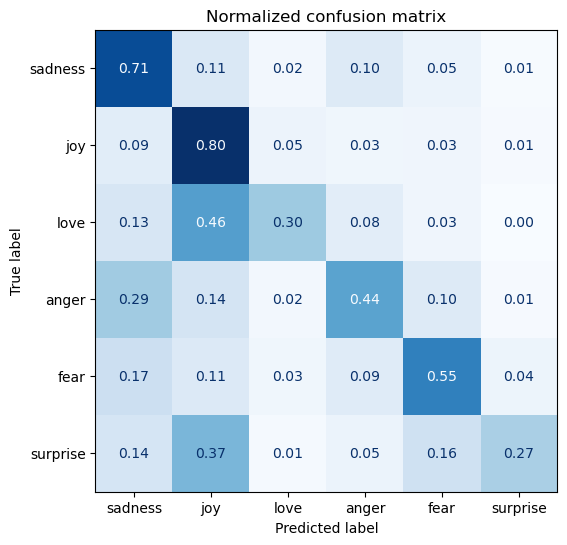

In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
import numpy, torch
import matplotlib.pyplot as plt

model_ckpt = 'distilbert-base-uncased'
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')


# put the model on GPU if it is available
# load the pretrained model weights and tokenizer for the corpus associated
# with the model
model = AutoModel.from_pretrained(model_ckpt).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


def tokenization(batch):
    return tokenizer(list(batch['text']),padding=True,truncation=True)

emotions = load_dataset('emotion')
# operates individually on every example in the corpus. Encodes the tweets
# in batches according to how they are organized into training, testing
# and validation
emotions_encoded = emotions.map(tokenization, batched=True, batch_size=None)
# each element of emotions_encoded has columns - text, label, input_ids, 
# attention mask. text is the original text of the tweet, label is the sentiment
# label and input_ids is the list of integers corresponding to the tokenization
# of the text
emotions_encoded.set_format('torch',columns = ["input_ids","attention_mask","label"])

def extract_hidden_states(batch):
    inputs = { k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # inputs has keys input_ids and attention_mask 
    # extract the last hidden states 
    
    with torch.no_grad():
        hidden_states = model(**inputs).last_hidden_state
        
    return {'last_hidden_states' : hidden_states[:,0].cpu().numpy()}


emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True)

X_train = numpy.array(emotions_hidden['train']['last_hidden_states'])
y_train = numpy.array(emotions_hidden['train']['label'])
X_val = numpy.array(emotions_hidden['validation']['last_hidden_states'])
y_val = numpy.array(emotions_hidden['validation']['label'])
X_test = numpy.array(emotions_hidden['test']['last_hidden_states'])
y_test = numpy.array(emotions_hidden['test']['label'])

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_val,y_val)

labels = emotions["train"].features["label"].names


def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) 
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False) 
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_val)
plot_confusion_matrix(y_preds,y_val,labels)

In [12]:
# to see how the above works consider the following sample text
text = 'this is a text.'
inputs = tokenizer(text, return_tensors='pt') # converts tokens to PyTorch tensors
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [13]:
inputs = {k:v for k,v in inputs.items()}
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793, 1012,  102]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

Now in order to fine-tune a transformer we follow the following steps:
1. Load the pretrained model and tokenizer.
2. Define the performance metrics.
3. Create the trainer class and train the model. 

In [3]:
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import f1_score, accuracy_score

num_labels=6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device))

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels,preds,average='weighted')
    acc = accuracy_score(labels,preds)
    return {"accuracy" : acc, "f1_score" : f1}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [11]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                num_train_epochs=2,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy="epoch",
                                disable_tqdm=False,
                                logging_steps=logging_steps,
                                push_to_hub=False,
                                log_level="error")

trainer = Trainer(model=model, args=training_args,
                compute_metrics=compute_metrics,
                train_dataset=emotions_encoded["train"],
                eval_dataset=emotions_encoded["validation"],
                tokenizer=tokenizer)

trainer.train()
preds_output = trainer.predict(emotions_encoded['validation'])

preds_output.metrics


RepositoryNotFoundError: 404 Client Error. (Request ID: Root=1-665d4005-4fd78f436b456e8c58fc3575;c1223971-5cac-4d83-9c84-23ed042c2887)

Repository Not Found for url: https://huggingface.co/api/models/distilbert-base-uncased-finetuned-emotion.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.

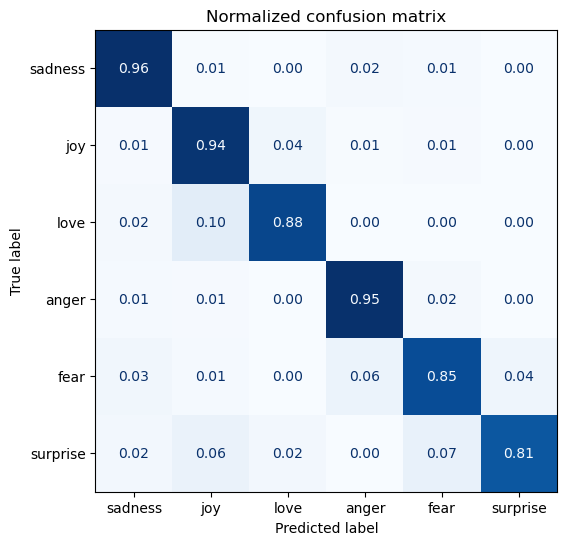

In [8]:
y_preds = numpy.argmax(preds_output.predictions,axis=1)

plot_confusion_matrix(y_preds,y_val,labels)

## Chapter 3 Transformer Anatomy

In this chapter we explore the main building blocks of transformer models and how to implement them using PyTorch.\
First we will focus on building the attention mechanism and then add the necessary bits to make a transformer encoder work. We will also look at how the transfomer encoder and decoder models differ.

The original transformer is based on the encoder-decoder architecture widely used for tasks like machine translation where a sequence of words is translated from one language to another. 
1. Encoder: converts an input sequence of tokens into a sequence of embedding vectors (often called the hidden state or context).
2. Decoder: uses the encoder's last hidden states to iteratively generate an output sequence of tokens, one token at a time.

1. For both encoders and decoders the tokenized text is fed through a token encoding layer (which replaces the tokens with input ids). 
2. There is a token embedding layer which converts the token one-hot basis vectors into dense vectors (embedding is learned with the rest of the structure). 
3. Because the attention mechanism is not aware of the relative positions of the tokens, token embeddings are thus combined with positional embeddings. 
4. After this step the encoder and decoder are both composed of encoder or decoder layers which are analogous to stacking convolutional layers in computer vision. 
5. The encoder's output is fed to each decoder layer and then the decoder generates a prediction for the most probably next token in the sequence. The output of this step is then fed back into the decoder to generate the next token along with the encoder outputs.

### The Encoder

The encoder consists of many encoder layers stacked next to each other where each encoder layer receives a sequence of embeddings and feeds them through sublayers:
1. Multi-head self-attention layer
2. Fully-connected feed-forward layer applied to each input embedding

Each encoder layer's output embeddings have the same size as the inputs. The point of the encoder stack is to update the input embeddings with context aware embeddings or representations of of the input tokens. E.g. the token embedding for the word 'apple' will be updated to be more 'company-like' and less 'fruit-like' if the words 'keynote' or 'phone' or 'app' are near it in text.

These sublayers use skip connections and batch layer normalization which are standard tricks to train deep neural networks effectively. 

#### Self-Attention

Attention is a mechanism for updating the representation of a token (originally an embedding vector in a dense vector space) to be more context-aware. In particular, it allows neural networks to assign different amounts of weight or "attention" to the elements in a sequence relative to all the other tokens in the sequence.

In the BERT model - each token is represented as a 768-dimensional vector. The self in self-attention refers to the fact that the weights are computed for all hidden states in the same set. 

Instead of using fixed embedding for each token, we can use the whole sequence of tokens to compute a weighted average so that the new hidden state is a weighted average of special embedding vectors called value vectors and the weights are called attention weights, computed as a scaled dot product of query and key vectors.

The scaled dot product attention works in a few steps:
1. Project each token embedding to a key vector, query vector, and value vector (by matrix multiplication. One key matrix, one query matrix, one value matrix for each attention head).
2. Compute attention scores by taking numpy.dot(key_i,query_j). Projections for more similar or related tokens will correspond to a larger dot product and hence a larger attention score indicating these two words are contextually important to one another. If there isn't much in common between the query and key there will be little overlap and hence a smaller score. For a sequence of n tokens the attention scores form an nxn matrix.
3. Next we compute attention weights from the attention scores by scaling the dot products. We do this to stabilize the training process because the dot products can be arbitrarily large values. To scale we divide by the square root of the length of the key vectors and then normalize with softmax to ensure the column values sum to 1. Softmax maps the ith attention score x_i to exp(x_i)/\sum_i{exp(x_i)} which is between 0 and 1 and the attention weights add up to 1.
4. Finally, we obtain the new token embeddings by summing the value vectors weighted by the attention weights.

[Input Embeddings] --> [Multi-Head Self-Attention] --> [Add & Norm] --> [Feed-Forward Network] --> [Add & Norm] --> [Next Layer]


We will use PyTorch to implement the Transformer architecture.\
   PyTorch       TensoFlow(Keras)                 Creates/Implements
1. nn.Linear     keras.layers.Dense               dense neural network layer
2. nn.Module     keras.layers.Layer               building block of models
3. nn.Dropout    keras.layers.Dropout             dropout layer
4. nn.LayerNorm  keras.layers.LayerNormalization  Layer normalization
5. nn.Embedding  keras.layers.Embedding           Embedding layer
6. nn.bmm        tf.matmul                        Batched Matrix multiplication
7. model.forward model.call                       model's forward pass


In [15]:
# First step is to tokenize the text and extract the input IDs
from transformers import AutoModel, AutoTokenizer,AutoConfig
from bertviz.transformers_neuron_view import BertModel

text = "time flies like an arrow"

model_ckpt = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)

inputs = tokenizer(text,return_tensors='pt',add_special_tokens=False)
inputs.input_ids
# pt indicates that we want to return pytorch tensors after tokenizing 

# each token in the input text has been mapped to a unique integer ID

100%|██████████| 440473133/440473133 [00:10<00:00, 40089947.14B/s]


tensor([[ 2051, 10029,  2066,  2019,  8612]])

In [16]:
# The next step is to create dense embeddings of the one-hot encodings 
# in pytorch we do this with am nn.Embedding layer

# we also use the AutoConfig class to load the config.json file associated with the bert-base-uncased
# model ckpt

from torch import nn
from transformers import AutoConfig

config = AutoConfig.from_pretrained(model_ckpt)
# loads the vocab size and hidden state size from the model_ckpt to create the embedding matrix
# which essentially acts like a lookup table for the input IDs
token_emb = nn.Embedding(config.vocab_size,config.hidden_size)
token_emb
# from the dimensions we see that each of the input IDs in our text will be mapped to one of the
# 30,522 vectors in our embedding each with length 768

Embedding(30522, 768)

Notice that these embeddings are completely devoid of context. A pair of homonyms like flies 
(time flies when you have fun vs the flies are biting me) will be mapped to the same dense vector.\

The role of the following layers will be to ensure that the resulting token embeddings will
remove ambiguity and inform the representation of each token with the content of its context.\
\

In [18]:
inputs_embedded = token_emb(inputs.input_ids)
print(inputs_embedded.size())
print(inputs_embedded) # giving us a tensor of shape (batch_size, sequence_length, hidden_dim)

torch.Size([1, 5, 768])
tensor([[[ 0.3984,  0.2144,  1.3044,  ..., -0.7004, -0.7851,  0.4854],
         [-0.2295, -0.0527, -0.2594,  ...,  0.4652,  0.5931,  0.6043],
         [ 0.0025,  1.4229,  0.0830,  ..., -1.3181, -0.4019,  1.0422],
         [-0.1426, -1.1277,  0.5784,  ...,  0.7739, -0.0670,  1.2551],
         [ 1.1049, -0.2197,  0.1531,  ...,  1.0715,  0.7782,  0.2077]]],
       grad_fn=<EmbeddingBackward0>)


Skipping positional encoding for now, the next step is creating key,query, value vectors

In [20]:
import torch
from math import sqrt

query = key = value = inputs_embedded
dim_k = key.size(-1)
scale = sqrt(dim_k)

attention_scores = torch.bmm(query,key.transpose(1,2)) / scale
attention_scores.size()

torch.Size([1, 5, 5])

This has created a 5x5 matrix of attention scores per sample in the batch (that is one matrix per input text / training sample). The query, key, value vectors are created by applying independent weight matrices to the embeddings. There is a score A_ij per each pair of input embedding vectors (one for each token).

The torch.bmm function performs a batch matrix-matrix product. Where the query and key vectors have dimensions (batch_size,seq_length,hidden_dim). Batch_size is the number of sequences processed at the same time, seq_length is the length of each sequence in the input, and hidden_dim is the dimension of the resulting hidden states. 

In [22]:
import torch.nn.functional as F

weights = F.softmax(attention_scores,dim=-1)
weights.sum(dim=-1)

tensor([[1., 1., 1., 1., 1.]], grad_fn=<SumBackward1>)

In [23]:
# Finally we multiply the attention weights by the values

attn_outputs = torch.bmm(weights,value)
attn_outputs.shape

torch.Size([1, 5, 768])

Putting all of this together we have the following:

In [28]:
def scaled_dot_product_attention(query,key,value):
    dim_key = key.size(-1)
    scores = torch.bmm(query,key.transpose(1,2)) / sqrt(dim_key)
    weights = F.softmax(scores,dim=-1)
    output = torch.bmm(weights,value)
    return output
    
# our attention mechanism with equal query and key vectors will assign a very large score to identical
# words in the context. More importantly, the meaning of a word will be better informed 
# by complimentary words in context. These words will receive a higher score. 


It turns out that it is beneficial to have multiple sets of linear projections - each one the output of a singular attention head. So, in multi-headed self-attention, we initialize multiple key,query,value matrices to produce multiple representations and projections with the idea that each attention head will focus on one aspect of similarity. With multi-headed attention we allow our model to find multiple aspects of similarity simultaneously.\
\
E.g. one head could find subject-verb interactions and another could find nearby adjectives. Similar to how in convolutional neural networks we think of different filters learning different tasks - edge detection, corner detection, colors, and building up to more abstract dectection mechanisms. Similarly here, these search methods are not hard-coded into the model but learned automatically during the usual batch gradient descent that the model employs.

Let's implement a self-attention layer by coding up a single attention head:

Basically the way this works is we perform a linear transformation for each of the key, query, and value vectors. We compute the scalar dot product attention and concatenate the results from each attention head. Then we apply the feed forward linear transformation again.

In [26]:
class AttentionHead(nn.Module):
    def __init__(self,embed_dim,head_dim):
        super().__init__()
        # each of these Linear layers is a matrix multiplication == densely connected layer
        self.q = nn.Linear(embed_dim,head_dim)
        self.k = nn.Linear(embed_dim,head_dim)
        self.v = nn.Linear(embed_dim,head_dim)
    def forward(self,hidden_state):
        # the hidden state is the thing we multiply the q,k,v matrices by to get key,query,value
        # vectors
        attn_outputs = scaled_dot_product_attention(self.q(hidden_state),self.k(hidden_state),self.v(hidden_state))
        return attn_outputs

In [25]:
# use self. when we need to use the value in another function
class MultiHeadAttention(nn.Module):
    def __init__(self,config):
        super().__init__()
        num_heads = config.num_attention_heads
        embed_dim = config.hidden_size
        head_dim = embed_dim // num_heads
        
        self.heads = nn.ModuleList(
            [AttentionHead(embed_dim,head_dim) for _ in range(num_heads)]
        )
        self.output_linear = nn.Linear(embed_dim,embed_dim)
    def forward(self,hidden_state):
        x = torch.cat([h(hidden_state) for h in self.heads],dim=-1)
        # this last output_linear layer ensures that the output tensor remains compatible
        # with the input dimensions expected by subsequent layers
        x = self.output_linear(x)
        return x
    

In the AttentionHead class the nn.Linear(embed_dim, head_dim) calls create matrices of embed_dim x head_dim (embed_dim rows and head_dim columns). Hence when we do the matrix multiplication to produce the attention scores and create new hidden states we do self.q(hidden_state) which is equivalent to

(seq_length, embed_dim) x (embed_dim, head_dim) = (seq_length, head_dim)
\
\
When we concatenate the attention outputs because each head produces output of dimension (seq_length, head_dim) and each head_dim = embed_dim // num_heads. The result of concatenation is an object with dimensions (seq_length, embed_dim). 

The concatenated output from the attention heads is fed through a final linear layer to produce an output tensor with shape [batch_size, seq_len, embed_dim].

In [30]:
multihead_attn = MultiHeadAttention(config)
attn_output = multihead_attn(inputs_embedded)
attn_output.size()
# attn_output has the correct shape (batch_size,seq_length,embed_dim)

torch.Size([1, 5, 768])

The feed-forward sublayer in the encoder and decoder is a simple two-layer fully connected neural network. Instead of processing the whole sequence of embeddings as a single vector it processes each embedding independently.\
\
The layer is often referred to as a position-wise feed-forward layer. A rule of thumb is for the hidden size of the first layer to be 4 x the size of the embeddings and GELU activation is usually used. This is where most of the capacity and memorization is hypothesized to occur and is usually the part scaled up in these models.

In [31]:
class FeedForward(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.linear_1 = nn.Linear(config.hidden_size, config.intermediate_size)
        self.linear_2 = nn.Linear(config.intermediate_size, config.hidden_size)
        self.gelu = nn.GELU()
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
    def forward(self,x):
        x = self.linear_1(x)
        x = self.gelu(x)
        x = self.linear_2(x)
        x = self.dropout(x)
        return x

Usually when applied to a tensor of shape (batch_size, input_dim) the feed-forward layer acts on each element of the batch dimension independently. When we pass a tensor of shape (batch_size,seq_length, hidden_dim) the layer is applied to all token embeddings of the batch and sequence independently. To test this:

In [32]:
# apply the attn outputs to the outputs of the multi-headed attention from the previous part
feed_forward = FeedForward(config)
ff_outputs = feed_forward(attn_outputs)
ff_outputs.size()


torch.Size([1, 5, 768])

In [33]:
ff_outputs

tensor([[[ 0.1575,  0.0129, -0.5777,  ...,  0.4211, -0.2635, -0.0174],
         [ 0.0963,  0.0636,  0.0512,  ...,  0.2102, -0.2366,  0.1391],
         [ 0.4372,  0.0000,  0.0878,  ..., -0.0208, -0.0304, -0.0263],
         [ 0.0993,  0.4154,  0.0000,  ..., -0.0000,  0.0302,  0.1533],
         [-0.0807, -0.2059, -0.2028,  ...,  0.0595,  0.0337,  0.0356]]],
       grad_fn=<MulBackward0>)

Now we have all the components to create a full fledged transformer encoder layer! The final decision is to decide on the place to put the skip connections and layer normalization. 

The Transformer architecture makes use of layer normalization and skip connections. Layer normalization normalizes each input in the batch to have zero mean and unity variance. Skip connections pass a tensor to the next layer of the model and add it to the processed tensor. 

There are two choices for placement of layer normalization:
1. Post Layer Normalization : Used in the Transformer paper, it places layer normalization in between the skip connections. This arrangement is difficult to train from scratch as gradients can diverge. Oftentimes the learning rate is gradually increased from a small value to a maximum value through training in a process called learning rate warm-up.
2. Pre Layer Normalization : Most common in the literature, it places layer normalization within the span of the skip connections. More stable to train.

Post Layer Normalization :

Multi-Head Attention -> Skip Connection Sum with Output -> LayerNorm -> FF NN -> Skip Connection Sum with Output -> LayerNorm

Pre Layer Normalization:

LayerNorm -> Mutli-Head Attention -> Skip Connection Sum with Output -> LayerNorm -> FF NN -> Skip Connection Sum with Output

In [61]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.layer_norm1 = nn.LayerNorm(config.hidden_size)
        self.layer_norm2 = nn.LayerNorm(config.hidden_size)
        self.attention = MultiHeadAttention(config)
        self.feed_forward = FeedForward(config)
    def forward(self,x):
        # apply layer normalization and copy the input into query, key, value
        hidden_state = self.layer_norm1(x)
        # apply attention with a skip connection
        x = x + self.attention(hidden_state)
        # apply feed-forward layer with a skip connection
        x = x + self.feed_forward(self.layer_norm2(x))
        return x
        
        
    

There's one last point we need to consider. We have done nothing to preserve positional information. Positional embeddings are meant to augment token embeddings with a position-dependent pattern of values arranged in a vector. If the pattern is unique to the position the attention heads can learn to incorporate positional information.

One of the common approaches is to use a learnable pattern esp when the pre-training dataset is sufficiently large.

We encode the position index instead of the token IDs as input. We will create an Embeddings module combining a token embedding layer that projects the input_ids to a dense hidden state together with the positional embeddings for position_ids. The resulting embedding is the sum of the two embeddings

In [62]:
import torch
class Embeddings(nn.Module):
    # max_position_embeddings is the maximum sequence sequence length the model might be used with
    def __init__(self,config):
        super().__init__()
        self.token_embeddings = nn.Embedding(config.vocab_size,
                                            config.hidden_size)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings,
                                                config.hidden_size)
        self.layer_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout()
    def forward(self,input_ids):
        seq_length = input_ids.size(1)
        position_ids = torch.arange(seq_length,dtype=torch.long, device = input_ids.device).unsqueeze(0)
        token_embeddings = self.token_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        
        embeddings = token_embeddings + position_embeddings
        embeddings = self.layer_norm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings
# now we create a single, dense embedding for each token incorporating the position and token
# embeddings

Putting all of this together yields:

In [65]:
class TransformerEncoder(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.embedding = Embeddings(config)
        self.layers = nn.ModuleList(
            [TransformerEncoderLayer(config) for _ in range(config.num_hidden_layers)]
        )
    def forward(self,x):
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x)
        return x

In [45]:
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

In [70]:
# now if we feed in out input ids

encoder = TransformerEncoder(config)
output = encoder(inputs.input_ids)
output

tensor([[[-2.5759, -0.4016, -2.8626,  ...,  0.8089,  0.4602,  1.0973],
         [-1.7076,  2.5021, -1.0770,  ...,  0.2411,  0.7177,  3.7572],
         [-0.1454,  0.5622,  1.2147,  ...,  2.2162, -0.3474,  2.6800],
         [-0.8081,  1.7811, -0.3221,  ...,  1.4616,  1.0561, -0.3383],
         [ 0.7879,  3.7514, -0.2381,  ...,  0.5640, -5.5717,  1.2997]]],
       grad_fn=<AddBackward0>)

In [72]:
output.size()

torch.Size([1, 5, 768])

Transformer models are usually divided into a task-independent body and a task-specific head. What we have built so far is the body so to build a text classifier we would need to attach a classification head to the body. We have a hidden state for every token we just need to make one prediction. 

In [ ]:
class TransformerForSequenceClassification(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.encoder = TransformerEncoder(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    def forward(self,x):
        x = self.encoder(x)[:,0,:] # select hidden state of [CLS] token
        x = self.dropout(x)
        x = self.classifier(x)
        return x

In [1]:
# before initializing the model we need to define the number of classes we want to predict
config.num_labels = 3
encoder_classifier = TransformerForSequenceClassification(config)
encoder_classifier(inputs.input_ids).size()

NameError: name 'config' is not defined

In [ ]:
import torch
from math import sqrt
import torch.nn.functional as F
def scaled_dot_product_attention(key,query,value):
    dim_k = key.size(-1)
    scores = torch.bmm(query,key.transpose(1,2)) / sqrt(dim_k)
    weights = F.softmax(scores,dim=-1)
    attn_output = torch.bmm(weights,values)
    return attn_output

In [9]:
config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.40.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
from transformers import AutoTokenizer, AutoConfig
from bertviz.transformers_neuron_view import BertModel

text = 'time flies like an arrow'
model_ckpt = 'bert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
config = AutoConfig.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)

inputs = tokenizer(text,return_tensors='pt',add_special_tokens=False)

In [ ]:
import torch
class AttentionHead(nn.Module):
    def __init__(self,embed_dim,head_dim):
        super().__init__()
        self.k = nn.Linear(embed_dim,head_dim)
        self.q = nn.Linear(embed_dim,head_dim)
        self.v = nn.Linear(embed_dim,head_dim)
    def forward(self,hidden_state):
        attn_output = scaled_dot_product_attention(self.k(hidden_state),
                                                self.q(hidden_state),self.v(hidden_state))
        return attn_output
    
class MultiHeadAttention(nn.Module):
    def __init__(self,config):
        super().__init__()
        embed_dim = config.hidden_size
        num_heads = config.num_attention_heads
        head_dim = embed_dim // num_heads
        
        self.heads = nn.ModuleList(
            [AttentionHead(embed_dim, head_dim) for _ in range(num_heads)]
        )
        self.output_linear = nn.Linear(embed_dim,embed_dim)
    def forward(self,hidden_state):
        x = torch.cat([h(hidden_state) for h in self.heads],dim=-1)
        x = self.output_linear(x)
        return x
    
class FeedForward(nn.Module):
    def __init__(self,config):
        super().__init__()
        embed_dim = config.hidden_size
        intermediate_dim = config.intermediate_size
        self.linear1 = nn.Linear(embed_dim,intermediate_dim)
        self.gelu = nn.GELU()
        self.linear2 = nn.Linear(intermediate_dim,embed_dim)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
    def forward(self,x):
        x = self.linear1(x)
        x = self.gelu(x)
        x = self.linear2(x)
        x = self.dropout(x)
        return x
        
# LayerNorm -> Mutli-Head Attention -> Skip Connection Sum with Output -> LayerNorm -> FF NN -> Skip Connection Sum with Output
class TransformerEncoderLayer(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.layer_norm1 = nn.LayerNorm(config.hidden_size)
        self.layer_norm2 = nn.LayerNorm(config.hidden_size)
        self.attention = MultiHeadAttention(config)
        self.FF = FeedForward(config)
    def forward(self,x):
        normed = self.layer_norm1(x)
        x = x + self.attention(normed)
        x = x + self.FF(self.layer_norm2(x))
        return x
        
class Embedding(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.token_embeddings = nn.Embedding(config.vocab_size,
                                            config.hidden_size)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings,
                                                config.hidden_size)
        self.layer_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout()
    def forward(self,input_ids):
        seq_length = input_ids.size(1)
        position_ids = torch.arange(seq_length,dtype=torch.long,device=input_ids.device).unsqueeze(0)
        token_embeddings = self.token_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)
        
        embeddings = token_embeddings + position_embeddings
        embeddings = self.layer_norm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings

class TransformerEncoder(nn.Module):
    def __init__(self,config):
        self.embedding = Embedding(config)
        self.EncoderStack = nn.ModuleList(
            [TransformerEncoderLayer(config) for _ in range(config.num_hidden_layers)
            ])
    def forward(self,x):
        x = self.embedding(x)
        for layer in self.EncoderStack:
            x = layer(x)
        return x

class TransformerForSequenceClassification(nn.Module):
    def __init__(self,config):
        super().__init__()
        self.encoder = TransformerEncoder(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    def forward(self,x):
        x = self.encoder(x)[:,0,:] # select hidden state of [CLS] token
        x = self.dropout(x)
        x = self.classifier(x)
        return x 